In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import fsspec
import glob
from scipy.optimize import curve_fit
from scipy.special import erf

In [2]:
file_urls = ['root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0014CE62-9C3E-E311-8FCC-00261894389F.root',
           'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/003EF6D5-B83E-E311-8157-003048D42D92.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0075E204-583E-E311-9749-00261894398C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0089898B-A23E-E311-83FD-0026189438F8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/00CA715D-753E-E311-9B3B-00304867920A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/00E14E66-8C3E-E311-8442-002618943810.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/02189AC0-6C3E-E311-9A67-002618943842.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0224FE84-BF3E-E311-8592-002618943854.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/02843B55-613E-E311-B51E-00261894393C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/028A7936-9B3E-E311-AEF5-002618943885.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/02C39E17-9D3E-E311-B5EF-003048FF86CA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/02F78600-B13E-E311-9844-003048FF86CA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/02FCC382-6F3E-E311-98B6-003048678F9C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/043774CF-673E-E311-8805-0025905964B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/043CDE04-643E-E311-AC35-003048678FF8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/047E8887-813E-E311-AD8F-003048FFD756.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/04C51273-833E-E311-8153-003048678C9A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0613BEFB-A43E-E311-9852-0026189438AD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/061A1D53-BA3E-E311-837C-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0649123D-7A3E-E311-AABF-003048FFD740.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/064E2603-643E-E311-9EC7-0025905938AA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0654E189-623E-E311-A5CD-0026189438A9.root', 
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/069CC4D8-B53E-E311-B41B-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/069F52E1-9E3E-E311-91AB-003048678FF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/06E3A1D7-8D3E-E311-B99E-0026189438AD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/06F5A554-A53E-E311-B85F-00261894388B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0805196D-8A3E-E311-AB87-003048D15DB6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0809F76D-983E-E311-AA14-002618943939.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08193D14-833E-E311-B961-003048FFCBB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/085DDAF2-6D3E-E311-82B9-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08B22129-783E-E311-AB61-0030486792B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08BFE028-C03E-E311-BC8B-00248C55CC7F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08C2DB01-943E-E311-8311-003048FFD744.root', 
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08E67BC0-C03E-E311-9B46-00261894387B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/08FC928A-883E-E311-8FEE-0025905822B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0A13E931-903E-E311-BBE7-003048FFD7C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0AED2D0C-883E-E311-9345-0026189438DD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C03C1E0-943E-E311-B3B5-003048FFD736.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C1230D1-853E-E311-BD5C-002618943904.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C4BFF70-833E-E311-BDB6-002618943896.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C8C3C7E-663E-E311-98C0-003048FFD71A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C8E3C62-5D3E-E311-91A2-002618FDA204.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0C9F6531-903E-E311-815A-00259059642A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0CA28ADD-A23E-E311-8223-00304866C398.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0CE8FAD2-B53E-E311-83EA-002618943986.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0CEC5EAE-683E-E311-AB6D-003048678B8E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0CF3CBF3-6D3E-E311-AEDD-002618943925.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E302C52-893E-E311-B2F6-002618943843.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E49849B-603E-E311-9F33-003048679182.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E4F218D-623E-E311-8057-00261894397F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E6DBCAA-8B3E-E311-A96A-003048678AE4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E8AE042-993E-E311-A437-003048678B18.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E96A08C-BF3E-E311-AC86-002618943854.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0E9CDC3F-A23E-E311-8220-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0EAFE73E-623E-E311-B7E8-002618943970.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0EC0E596-643E-E311-8E31-0030486792A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/0EFFB595-603E-E311-8EDF-00304867906C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/100EF6FA-683E-E311-8997-003048678B38.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/10160CB9-8C3E-E311-9C96-0025905964C0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1030CAFC-523E-E311-83FF-00261894395C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/103A9971-963E-E311-8E4D-0026189437E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1045E6E7-C23E-E311-9F3D-00259059649C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1063147F-7B3E-E311-9F05-0026189438B1.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/107910B5-743E-E311-93F1-003048679294.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/10BFEEAB-4F3E-E311-8E9B-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/10DBCA89-8D3E-E311-B53B-0025905964B2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/10F62794-883E-E311-8DC9-0025905938D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1203D830-AF3E-E311-BB2E-003048678A6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/12507A39-B23E-E311-93AA-00259059642A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/12B24364-753E-E311-AC6D-003048FFCC18.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/12BB675A-613E-E311-834C-003048FFCBA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/12E22C07-963E-E311-B5A6-003048FFD71A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/12ECFB96-733E-E311-89D4-00304867C1BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/140A866D-753E-E311-B3B7-00259059391E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/14204F51-8F3E-E311-A890-0026189437FA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/143D32B1-523E-E311-9BCB-002618FDA26D.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/14445897-6C3E-E311-8E66-0025905964B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/144F2A6B-613E-E311-BBD3-002618943947.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/14D02979-823E-E311-9983-002618943921.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/16059EED-B73E-E311-BBCE-003048679084.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1610F667-BC3E-E311-81B6-003048678FE4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/16494FFA-9C3E-E311-AA07-003048FFD7D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/166C77C6-5D3E-E311-BC24-003048678BE6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/168E1E2B-BC3E-E311-8225-003048FFCC18.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/169B6A8B-623E-E311-8DD2-002354EF3BDE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/16D8DDAA-9C3E-E311-B67A-002618943920.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/16DAA118-913E-E311-99B5-003048FFD740.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1811E60F-8B3E-E311-AB92-002618943896.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18670B03-593E-E311-8B4B-003048679076.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1882D65E-5D3E-E311-8C24-002618943974.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18A14841-993E-E311-9F6B-002618943975.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18A9848A-7F3E-E311-9553-003048679182.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18C1A4A9-643E-E311-AC8A-0025905964C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18C2A7C2-A13E-E311-B1E5-002590593920.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18D5E387-883E-E311-A81C-003048678B44.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18DD1946-B43E-E311-A19A-002618943905.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/18F0C73C-A23E-E311-B882-003048678F62.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1A0E40D9-813E-E311-B6D8-002618943961.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1A58CD63-A73E-E311-B890-003048678BC6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1AAD9A7C-8A3E-E311-93E6-002618943880.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1AB91717-713E-E311-A38F-0026189438A2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1AC5982E-953E-E311-BCE4-0025905964C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1ADA1DAB-513E-E311-BD22-0026189438B3.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1AFF9106-713E-E311-A844-0026189437F9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C129990-6B3E-E311-A318-00261894395F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C19F179-4B3E-E311-9FE4-002590596486.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C33DE0F-773E-E311-962E-0025905964BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C5B6AB3-7E3E-E311-8679-003048FFD7C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C697F42-723E-E311-86A3-0026189437F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C7F6B29-663E-E311-B633-00304867918A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1C7FC8AA-A03E-E311-837F-002618FDA211.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1CB10FAA-8C3E-E311-934F-003048678FB8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1CB28951-793E-E311-9FC6-003048FFD76E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1CD793C0-6C3E-E311-A092-00304867C04E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1CE46C1C-583E-E311-BEBB-003048678E24.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E0A55F8-753E-E311-8182-002618FDA207.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E22226F-743E-E311-BFE6-002354EF3BE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E709A03-883E-E311-BB3A-002590593878.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E79AD4B-603E-E311-829E-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E7B772D-7B3E-E311-92BF-00304867BFAE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E7B78F0-B13E-E311-885F-0026189438F2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E7E9FAE-A13E-E311-982B-003048FFCB96.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1E9ECB62-A13E-E311-84B3-003048FFCB84.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1EC0E2E4-C23E-E311-AEFF-0026189438A0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/1EEA9A72-673E-E311-A3DA-0026189438E7.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/201C197B-663E-E311-9FFF-0026189438EF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2036F698-603E-E311-92A8-00261894397F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/20400A56-713E-E311-9D88-0026189438B5.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/204C82A7-A03E-E311-A620-0025905964C4.root', 
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2056F32C-823E-E311-8FD9-0026189438E9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/20605842-BC3E-E311-A62F-002618943866.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/20961318-643E-E311-88D0-0026189438B4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/20B9ABB4-703E-E311-A2A2-002618943864.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/221389CC-BA3E-E311-975F-002618FDA207.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2217F92C-783E-E311-8ACD-0025905964BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/222EBE7B-663E-E311-A1AA-00261894396B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/222F1CD3-5A3E-E311-8A25-0026189438DD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/224B53F8-693E-E311-A36B-002618943969.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/224CD445-C23E-E311-8B49-0025905938B4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/22938E88-7E3E-E311-B410-002618943956.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/229F2ACE-543E-E311-AFC3-003048678A78.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/22DE9F70-713E-E311-964A-002618943867.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/22EC954F-B13E-E311-B93F-003048FFD7D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2410EF5B-713E-E311-8952-00261894384A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24359C39-9E3E-E311-A27B-00259059642E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2437BF89-973E-E311-BE6E-0026189437E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/243C0A9A-7D3E-E311-8C8D-0026189438D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24434A43-5B3E-E311-A411-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2445216B-783E-E311-B479-003048679244.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2452C465-AA3E-E311-9A34-0026189438E2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2494E557-8C3E-E311-847A-002618943832.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24B13DF1-A03E-E311-A19A-0025905938A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24B58D83-973E-E311-A337-0026189437EC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24C2F93A-853E-E311-8DEB-0026189438E9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24D15F74-5E3E-E311-95EE-00261894394B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24EA619F-4F3E-E311-8A7C-00248C55CC97.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/24EEE229-773E-E311-9FDE-002618943842.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2615CFEC-943E-E311-9BE3-002618943811.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2650EE23-5E3E-E311-8977-0026189438BF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/265B9017-8B3E-E311-9EDD-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2660C355-5B3E-E311-B1AF-00261894389A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2662131C-843E-E311-87BC-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/26C13EF6-9C3E-E311-841C-002618943976.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/26C38FF5-B33E-E311-9727-003048678C06.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/26CA41B2-703E-E311-8E6F-003048FFD796.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/280B37A7-843E-E311-AB68-0026189438B1.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/282E71E6-BA3E-E311-9F58-002618943867.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/283E6A03-AE3E-E311-BFF7-002618943969.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2876A711-6C3E-E311-8C88-002354EF3BE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/288C2897-723E-E311-959C-003048FFCC0A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/28AB4E5B-913E-E311-912A-00248C55CC62.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/28B7B122-563E-E311-8484-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/28D15008-713E-E311-81B9-002618943984.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A02FE2A-783E-E311-98C4-003048FFD79C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A0A50F8-5A3E-E311-A002-0026189438B1.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A21ED13-7C3E-E311-8AD6-0026189438B1.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A30528A-6E3E-E311-9A0B-0025905964CC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A351FD2-9A3E-E311-BDE8-00261894388F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A3EA466-AA3E-E311-A187-0026189438A2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A41D868-8F3E-E311-933E-0025905964B2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A4C696B-643E-E311-8DF6-0025905964BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A611123-903E-E311-8CB3-0026189438FE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2A81D023-B03E-E311-BDD4-003048FFD7D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2AAD53EC-6A3E-E311-BF81-002590596486.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2AB4A840-923E-E311-B61E-002590593902.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2ACE56E9-B73E-E311-B454-003048D42D92.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2AD9B32C-AD3E-E311-8C33-003048FFCBB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2ADA7733-733E-E311-857C-003048678A78.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2C2A6B98-693E-E311-A9F9-002590596498.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2C4060D1-BB3E-E311-BD6C-00261894392F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2C95D1BA-523E-E311-A4D2-0030486790A6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2CBFA378-6B3E-E311-B0DC-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2CC3468C-7E3E-E311-8DDA-003048FFCC2C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2CD67CA3-7D3E-E311-A866-00259059649C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2CDE495B-873E-E311-804E-002618943983.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E0383EE-663E-E311-A0E0-0025905964B4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E0BA64F-8F3E-E311-932B-003048678B84.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E114B53-813E-E311-825B-00261894390A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E16D432-9B3E-E311-8034-00261894389A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E1EACB0-B03E-E311-9FBB-00261894382A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E38BDA6-803E-E311-975D-003048679180.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E3B9621-C03E-E311-BF00-00261894383B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E4CE6AB-753E-E311-8C9E-0026189438DE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E7CB1AE-6D3E-E311-8A6B-0026189438E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E7FB61A-A43E-E311-9BD9-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E9263B2-743E-E311-BEC9-0026189438BD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E9A619D-AB3E-E311-A982-003048FFCC2C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2E9FBE31-BF3E-E311-8456-00261894388A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2EAF9534-763E-E311-8C19-003048678B00.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2EB108D3-853E-E311-85CA-00248C55CC9D.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2EE541F5-913E-E311-BE78-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/2EF3EAE4-9A3E-E311-8659-00248C0BE016.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/300632CF-773E-E311-AC75-0025905964BE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/302AB7EE-6D3E-E311-8489-002618FDA210.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/303C0BEA-843E-E311-B979-002618FDA210.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/3049C5D0-903E-E311-BBD5-0026189438BF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/30CF1571-A13E-E311-852D-002590596468.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/30FBA557-6D3E-E311-A051-0026189438EB.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/325C117D-973E-E311-B04B-00261894397E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/325C8D44-AE3E-E311-BC66-002618943972.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/328ACBBB-933E-E311-A4E4-002590596486.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/32B6A9AC-613E-E311-A9A6-003048678AE2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/3416B243-6A3E-E311-945A-0026189438E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34643BAE-873E-E311-92AA-003048FFD7D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34688F90-A23E-E311-A140-003048FFD720.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/348C3BDF-923E-E311-823E-002618943905.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34976DD1-9A3E-E311-A64E-002618943800.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/349C4E25-5C3E-E311-A2A5-002354EF3BDF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34A28671-A93E-E311-8321-003048FFCB74.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34C0B64E-6A3E-E311-A0A9-003048FFCBA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34E82354-613E-E311-8B67-003048679182.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34F8FC2C-9F3E-E311-BDE6-0026189438E9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/34FA0F64-583E-E311-AD8C-003048FFCC2C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/36050F22-933E-E311-BB81-002618943920.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/3605AE5D-BD3E-E311-9330-002590596486.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/362321DA-5A3E-E311-B0EB-0025905964C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/36406EB1-873E-E311-A0D9-0026189438D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/365C7051-653E-E311-A4FF-003048D15E24.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/366CB9D2-B23E-E311-91C5-003048679012.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/367489BD-9F3E-E311-A0A0-0026189438B1.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/36A9FBC5-773E-E311-81B8-003048678FE0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/36AE15F7-C23E-E311-8FDD-0025905964C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/36CC5261-583E-E311-A94C-002354EF3BDD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/38377EBA-AC3E-E311-9419-003048678A6C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/38840247-723E-E311-B609-0026189438AC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7A7D95AD-513E-E311-B0DC-00248C0BE005.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7A828294-BE3E-E311-8413-003048678FD6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7A88D199-643E-E311-A16D-003048679180.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7A8F0112-513E-E311-8623-00248C0BE018.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7AB4558C-623E-E311-8B4B-003048FFD71E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7ABB7F74-673E-E311-8F92-003048678FF8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7AD81533-733E-E311-AAEF-00261894393E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7AF38D36-733E-E311-87D3-003048FFD756.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C12016F-A13E-E311-AEA6-003048FFD740.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C21423F-773E-E311-AD30-003048FFD756.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C26FBD9-6E3E-E311-BE1F-00304867916E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C35C276-A13E-E311-B7A3-00259059649C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C3DF4B7-5D3E-E311-B310-002618FDA287.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C5D03AA-A03E-E311-8517-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7C600EAC-A43E-E311-9ACC-0026189437F9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CC28E5A-873E-E311-9C68-003048678BF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CC943E8-BA3E-E311-8278-002618943947.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CE228DC-6E3E-E311-911C-003048B95B30.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CE2AF73-9B3E-E311-B7C4-003048D42D92.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CE9F271-673E-E311-9A2A-002618943983.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7CF74157-7A3E-E311-A2BB-002590596498.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7E28A094-793E-E311-8DA5-0025905964C0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7E49DC86-5C3E-E311-8261-00259059391E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7E8996FF-703E-E311-BD2B-0026189438B8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/7EA71B28-B93E-E311-8D3A-0025905938D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8009C882-8A3E-E311-9828-003048FF9AA6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/80221D65-583E-E311-BC38-00304867924E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8051EC95-603E-E311-8441-002590593872.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8052F883-973E-E311-BA41-0026189437E8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/80625AD9-BB3E-E311-96DA-003048FFD756.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/80825698-4F3E-E311-BC45-002618943842.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/80A78736-653E-E311-B514-002618943832.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/80B08E3C-A43E-E311-A9D9-003048FFD7C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8268EE53-643E-E311-8027-003048678FF6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/82869B82-B53E-E311-85EA-0026189438D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8296075A-A83E-E311-96A8-003048FFD754.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/82F0889F-7D3E-E311-951F-003048679182.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/82F0C731-A73E-E311-BC2A-003048FFD720.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/841244E7-883E-E311-A5AF-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8460AD14-7C3E-E311-95C6-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/84F3EBE8-9E3E-E311-935A-0025905964C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8603A62C-7B3E-E311-B7B6-002618943914.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/86332EC2-B93E-E311-B842-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8637D7A7-593E-E311-8BC0-003048FFD736.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/86696ED7-6A3E-E311-8DD1-002618FDA208.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/86847435-823E-E311-943E-003048FFD732.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/86C221E9-883E-E311-8A2B-00259059642A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/86F1ADED-963E-E311-AD30-002618943821.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8808C63B-A93E-E311-987C-003048FFD732.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/882861A4-B73E-E311-9D05-002618943956.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/883662FF-4D3E-E311-AC91-003048D15E24.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8888D411-683E-E311-87DC-0025905964C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8893AFD9-6E3E-E311-9E43-003048679296.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/88B70C5D-9C3E-E311-A358-003048678BB2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/88BAEB21-553E-E311-A83B-002618FDA265.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/88CA2678-5E3E-E311-9EA8-00261894396F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/88E99208-843E-E311-9B11-003048679012.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/88EA9220-983E-E311-9684-0025905964BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8A0A9EDB-B43E-E311-9AAC-0025905822B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8A27E1E7-663E-E311-8FC8-0025905938A4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8A8796D2-5C3E-E311-A9FA-003048FFD744.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8AC717ED-623E-E311-83F3-002618943875.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8ACA0A6C-7F3E-E311-9A4A-003048D15DB6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8C11436F-9B3E-E311-A56C-003048678B18.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8C4A7256-793E-E311-AD74-00248C55CC40.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8C4BB72D-663E-E311-BB18-002590593902.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8C4FD32E-9F3E-E311-8A9B-002618943959.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8C641968-743E-E311-AD0C-0026189438DD.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CBDF4E0-763E-E311-8AC5-002590596498.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CC4F8ED-6D3E-E311-BE6C-002618FDA204.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CC769E9-713E-E311-8520-00248C0BE012.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CD662FC-B03E-E311-AF3D-003048679180.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CEE4E3B-5A3E-E311-9C10-0026189438E0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8CF7946E-AA3E-E311-90D0-003048FFCC2C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8E1200ED-B73E-E311-9F51-00261894393C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8E19B24F-603E-E311-87B0-00259059642E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8E58D1B1-7C3E-E311-B63F-003048FFCBFC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8EC79E68-523E-E311-8ECD-00261894388F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8EC9702D-9B3E-E311-900F-002618943933.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8ECE396F-A93E-E311-BD52-002618943913.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8EEE5ADD-813E-E311-B8B8-0025905964BA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/8EFEEA14-A03E-E311-8EE6-003048FF9AC6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/90273501-583E-E311-A721-00261894397A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9065890B-843E-E311-A045-003048FFD7C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/90676DDB-6E3E-E311-B79A-003048FF9AA6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/90D25B2A-9E3E-E311-B43B-00248C0BE014.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/90DB2D59-713E-E311-AF65-00261894388F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/90E24C77-B93E-E311-BB4C-002618943923.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/923CB6BE-7F3E-E311-B128-00261894393C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/923DE559-8C3E-E311-95A2-0025905938A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/924C43DB-9D3E-E311-ADBE-0025905964C4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/926B4488-493E-E311-83BB-003048678BF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9294F27D-5E3E-E311-8876-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/92AB4A36-9B3E-E311-B34F-0026189438DB.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/92B3A622-553E-E311-BE3B-002618943886.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/92F1DC09-BD3E-E311-8D7A-002618943866.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/92F39B83-733E-E311-ADBF-00261894397D.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9417380D-A03E-E311-B206-003048678BF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/941A91C5-863E-E311-8184-002618943983.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/94239506-573E-E311-878A-002618943811.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/942415DA-613E-E311-956F-002590596486.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/942AB07C-AF3E-E311-8D22-003048679166.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/944009CE-853E-E311-AD1B-003048678B38.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/947B5E34-B23E-E311-ACB2-002618943969.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/94BB877D-9B3E-E311-A088-0025905964A2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/94CC6F96-983E-E311-91C9-0026189438CF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/960AF8B6-873E-E311-9AEE-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9616AB15-793E-E311-A6FB-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9632C5DC-623E-E311-8C65-002618943964.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/969893CF-9F3E-E311-A84F-002618943810.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/96C0BF8C-7F3E-E311-B2ED-003048679182.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/96D119DA-A83E-E311-B71D-00259059649C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/96EB77CF-B83E-E311-922C-003048678BF4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/980837D9-623E-E311-91BE-002618943821.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/98165B27-BF3E-E311-AC5C-0025905822B6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/98292A30-7A3E-E311-BE39-003048FFCBB0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/987ED704-943E-E311-88ED-0025905964BE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/98ED4128-B53E-E311-996B-00261894386C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9A0D3EB8-703E-E311-9E09-0030486790B8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9A3A103D-5B3E-E311-813B-0026189438F3.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9A62A98D-853E-E311-95E8-002618943865.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9AA3913F-5A3E-E311-A32F-003048678F26.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9AD9F854-613E-E311-8671-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9AE309B2-753E-E311-8726-003048FFCB6A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9AE37F4B-523E-E311-85A9-00304867C1BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9AF29C2D-713E-E311-B791-0026189438B9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9C00F049-603E-E311-85BD-003048FFCB84.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9C12FD82-8A3E-E311-869B-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9C221EB5-683E-E311-9647-002618943940.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9CC952A4-843E-E311-AE03-002618943882.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9CE4FC6E-863E-E311-9750-00261894397B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9E0302DF-9A3E-E311-9D47-003048678BE6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9E0CEA31-5C3E-E311-899A-003048FF9AA6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9E3FA8B8-7F3E-E311-8BCF-00304867906C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9E8105C0-A63E-E311-AB85-003048678B04.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9E81A23D-9B3E-E311-B22D-002354EF3BCE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9EACFD7E-6F3E-E311-81F5-002618943849.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9EC0304F-A83E-E311-BA4D-0025905964BC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/9EFD37F4-8C3E-E311-AD4C-00261894393C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A00C604E-813E-E311-A1AC-003048FFD7A2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A01FBBAB-9C3E-E311-84F2-0026189438DF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A04F1D43-7D3E-E311-B7D2-003048FFD736.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A0612FB1-7C3E-E311-BA4E-003048FFD796.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A068B559-973E-E311-BA7B-002618943885.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A0844551-8F3E-E311-B4E3-0025905938AA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A089ECD3-B53E-E311-B7D4-00259059391E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A08BD260-913E-E311-8971-002618943932.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A0C9A0F0-BD3E-E311-96B1-003048678B36.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A0DC4880-823E-E311-AAE4-00261894390C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A0E453DF-7E3E-E311-9CD8-002618943966.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A2109DE1-963E-E311-BFEB-003048679294.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A23EE9A7-BA3E-E311-A83A-002618943915.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A2588315-803E-E311-91B8-002618943979.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A2872F1A-643E-E311-A12D-003048D15E24.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A29A9F5F-5F3E-E311-933A-002618943947.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A2F578CF-6F3E-E311-8ABC-003048679166.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A2FF2525-4F3E-E311-8AAF-003048FFD752.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A40FFB0E-833E-E311-A40B-00261894390A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A44DC0EE-BD3E-E311-AAEA-00261894387B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A4BB19D5-7E3E-E311-B22F-003048FFCC1E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A4E67985-6B3E-E311-9232-0025905964B2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A4FCA231-8A3E-E311-81A9-003048678BE6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A4FCCE38-AC3E-E311-BDFE-002590596484.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A4FF377C-6B3E-E311-9D4D-003048678B04.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A60A90DE-763E-E311-A631-003048679164.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A61D77F7-6D3E-E311-8BE2-003048FFD736.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A6409883-6B3E-E311-A420-0025905938D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A64471A4-6D3E-E311-93A1-0026189438DF.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A6469A5E-A13E-E311-98E2-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A68BDA58-8B3E-E311-9303-00261894393C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A6DBD004-803E-E311-A996-003048FFCB9E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A6FF0473-783E-E311-ADAA-0026189438E0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A82D20BC-7F3E-E311-A451-00261894397B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8630122-6C3E-E311-AC6D-003048FFCBA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A86D0E62-9C3E-E311-AAA0-0025905938A8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A86E08E9-883E-E311-9165-0026189438FE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8711900-593E-E311-A93C-003048678FB4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8794965-A73E-E311-A2AD-003048FFD760.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8A74CB6-7F3E-E311-A1D3-0026189438B0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8AA29CA-773E-E311-9E79-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/A8BF6214-8F3E-E311-951D-003048FFD7D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA044476-9B3E-E311-959A-002618943946.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA146898-C23E-E311-9420-00259059642A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA63C02C-783E-E311-B157-003048679084.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA6F7125-4F3E-E311-AC0A-002618943849.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA7F21B7-C03E-E311-9A90-002618943930.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA80561F-AA3E-E311-B4BB-00261894391C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AA8D0437-823E-E311-A0E5-003048FFD796.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AABC6B94-7A3E-E311-BD81-0026189438D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC1C729C-7D3E-E311-B3E6-002618943943.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC1E0508-A03E-E311-8D03-003048FFD796.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC37E184-973E-E311-9800-00304867929E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC421EAC-873E-E311-9F49-002590596468.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC4BCDEF-593E-E311-AD06-003048FFD720.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AC797922-983E-E311-85EB-002618943948.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/ACA1A6D9-9A3E-E311-B79E-0030486792B8.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/ACBA7B21-833E-E311-9370-0026189438E9.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/ACC4EB01-793E-E311-A200-003048B95B30.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/ACDE3EBF-5D3E-E311-94CB-00261894386F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/ACE3972B-6B3E-E311-ADE7-002590593878.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AE396D64-5F3E-E311-B101-003048678FDE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AE884798-A23E-E311-BA16-00259059649C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/AE980F2B-A63E-E311-8C43-0025905938AA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B02497AF-703E-E311-B208-002618943915.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B02AF3F8-9C3E-E311-950F-002590596490.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0516580-543E-E311-A1A4-003048678F9C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B07B8050-493E-E311-A6D5-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B07E40D7-543E-E311-9034-003048679188.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B07FDC23-C03E-E311-A0AC-002618943849.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0831A2D-663E-E311-AB0A-002618943930.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B09B59F2-C13E-E311-BF25-00304867D836.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0AE9595-893E-E311-AB91-00261894383F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0C68DED-533E-E311-B963-0026189438E2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0E340C2-903E-E311-B0F9-00261894391B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B0E40B2A-803E-E311-8787-00248C0BE013.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B20BB5D8-953E-E311-8EE7-0025905938D4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B230E30C-5F3E-E311-819F-00261894393D.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B2580DFB-A03E-E311-ABBE-0025905938B4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B2679169-B33E-E311-BCF7-00304867916E.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B2A547FE-B63E-E311-9073-00261894389A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B4117097-A53E-E311-A77A-003048FFD75C.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B41B65F0-A73E-E311-890E-0025905964C2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B424E59C-593E-E311-8907-00304867BFBC.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B4567102-593E-E311-AADB-003048678FDE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B63294D3-9A3E-E311-8A9D-0026189438FE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B64FF4B7-933E-E311-97BB-003048678FD6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B66966A6-733E-E311-AB05-002590596484.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B676FD87-9D3E-E311-AD1D-0025905964A2.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B6CAA6C0-583E-E311-852E-003048FFD760.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B6DCBF7A-823E-E311-ADEA-00261894391F.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B6E7AB27-C03E-E311-8D9E-00261894387B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B818D680-503E-E311-B01C-003048FFCBA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B82B39FE-B63E-E311-9D40-00261894398A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B8453624-8E3E-E311-A45B-00304867C0EA.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B8460DA6-843E-E311-A0A8-00261894380B.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B870B60F-933E-E311-951A-002618943821.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B8A3F0B4-803E-E311-B159-002618943920.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/B8CE7BB8-583E-E311-98E9-0030486792F0.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BA3C70B8-4E3E-E311-8831-003048FFD7BE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BA542872-A63E-E311-AEC3-003048FFD7BE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BA5B2280-973E-E311-B99A-002618943856.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BA6C65BB-583E-E311-8900-003048D3C010.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BA930DC3-863E-E311-852F-00304867915A.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BACD4B02-573E-E311-B9B4-002618943880.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BAE868E8-473E-E311-8716-003048678B84.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BC088528-833E-E311-B632-003048FF9AA6.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BC098968-983E-E311-99A8-002354EF3BDE.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BC2F51A7-613E-E311-BD5F-003048FFCBA4.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BC4AD0C6-5C3E-E311-8F28-002618FDA248.root',
'root://eospublic.cern.ch//eos/opendata/cms/Run2011A/DoubleElectron/AOD/12Oct2013-v1/20000/BC63EB5B-613E-E311-AC50-002354EF3BE3.root']

In [3]:
branches = [
    "recoGsfElectrons_gsfElectrons__RECO.obj.pt_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.eta_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.phi_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.mass_",
    "recoGsfElectrons_gsfElectrons__RECO.obj.chargeInfo_.scPixCharge"
]

data = uproot.concatenate({file_url: "Events" for file_url in file_urls}, branches)

In [4]:
electron_pt = data["recoGsfElectrons_gsfElectrons__RECO.obj.pt_"]
electron_eta = data["recoGsfElectrons_gsfElectrons__RECO.obj.eta_"]
electron_phi = data["recoGsfElectrons_gsfElectrons__RECO.obj.phi_"]
electron_mass = data["recoGsfElectrons_gsfElectrons__RECO.obj.mass_"]
electron_charge = data["recoGsfElectrons_gsfElectrons__RECO.obj.chargeInfo_.scPixCharge"]

valid_electrons = (electron_pt > 7) & (np.abs(electron_eta) < 2.5)

electron_pt = electron_pt[valid_electrons]
electron_eta = electron_eta[valid_electrons]
electron_phi = electron_phi[valid_electrons]
electron_mass = electron_mass[valid_electrons]
electron_charge = electron_charge[valid_electrons]

valid_events = ak.num(electron_pt) >= 2
electron_pt = electron_pt[valid_events]
electron_eta = electron_eta[valid_events]
electron_phi = electron_phi[valid_events]
electron_mass = electron_mass[valid_events]
electron_charge = electron_charge[valid_events]

max_electrons = 4  # Maximum expected electrons per event
electron_pt = ak.pad_none(electron_pt, max_electrons, clip=True)
electron_eta = ak.pad_none(electron_eta, max_electrons, clip=True)
electron_phi = ak.pad_none(electron_phi, max_electrons, clip=True)
electron_mass = ak.pad_none(electron_mass, max_electrons, clip=True)
electron_charge = ak.pad_none(electron_charge, max_electrons, clip=True)

electron_pt = ak.fill_none(electron_pt, 0)
electron_eta = ak.fill_none(electron_eta, 0)
electron_phi = ak.fill_none(electron_phi, 0)
electron_mass = ak.fill_none(electron_mass, 0)
electron_charge = ak.fill_none(electron_charge, 0)

electron_pt = ak.to_numpy(electron_pt)
electron_eta = ak.to_numpy(electron_eta)
electron_phi = ak.to_numpy(electron_phi)
electron_mass = ak.to_numpy(electron_mass)
electron_charge = ak.to_numpy(electron_charge)
print(len(electron_charge))

electron_p4 = np.stack((
    electron_pt * np.cos(electron_phi),
    electron_pt * np.sin(electron_phi),
    electron_pt * np.sinh(electron_eta),
    np.sqrt(electron_pt**2 + electron_mass**2),
), axis=-1)

3599940


In [5]:
'''def valid_z_candidates(charges):
    """Ensure opposite-sign, same-flavor (OSSF) pairing for Z boson reconstruction."""
    return (charges[:, 0] * charges[:, 1] < 0) & (charges[:, 2] * charges[:, 3] < 0)

z_valid = valid_z_candidates(electron_charge)
electron_p4 = electron_p4[z_valid]'''

'def valid_z_candidates(charges):\n    """Ensure opposite-sign, same-flavor (OSSF) pairing for Z boson reconstruction."""\n    return (charges[:, 0] * charges[:, 1] < 0) & (charges[:, 2] * charges[:, 3] < 0)\n\nz_valid = valid_z_candidates(electron_charge)\nelectron_p4 = electron_p4[z_valid]'

In [6]:
def invariant_mass_4l(lep1, lep2, lep3, lep4):
    """Compute invariant mass of four leptons."""
    E = lep1[:, 3] + lep2[:, 3] + lep3[:, 3] + lep4[:, 3]
    px = lep1[:, 0] + lep2[:, 0] + lep3[:, 0] + lep4[:, 0]
    py = lep1[:, 1] + lep2[:, 1] + lep3[:, 1] + lep4[:, 1]
    pz = lep1[:, 2] + lep2[:, 2] + lep3[:, 2] + lep4[:, 2]
    mass_squared = E**2 - (px**2 + py**2 + pz**2)
    mass_squared[mass_squared < 0] = 0
    return np.sqrt(mass_squared)

lepton1 = electron_p4[:, 0]
lepton2 = electron_p4[:, 1]
lepton3 = electron_p4[:, 2]
lepton4 = electron_p4[:, 3]

In [7]:
mH = invariant_mass_4l(lepton1, lepton2, lepton3, lepton4)
higgs_mass = ak.to_numpy(mH)

print(len(higgs_mass))

3599940


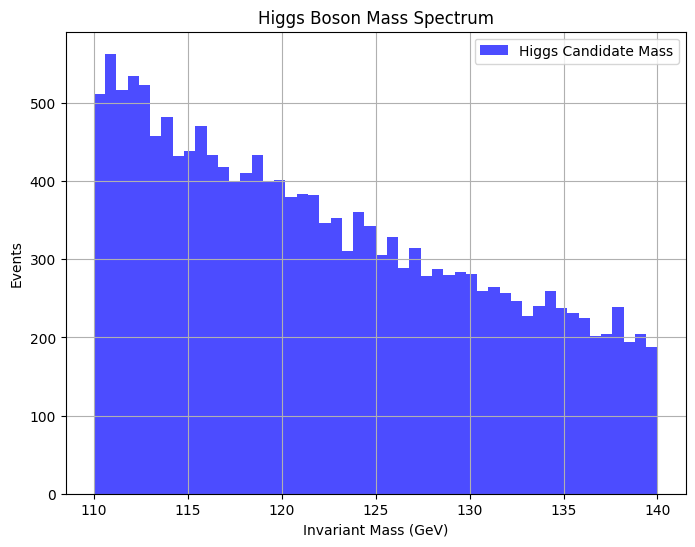

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(higgs_mass, bins=50, range=(110,140), color='blue', alpha=0.7, label="Higgs Candidate Mass")
plt.xlabel("Invariant Mass (GeV)")
plt.ylabel("Events")
plt.title("Higgs Boson Mass Spectrum")
#plt.axvline(125, color='red', linestyle='dashed', linewidth=2, label="Higgs (125 GeV)")
plt.legend()
plt.grid(True)
plt.show()

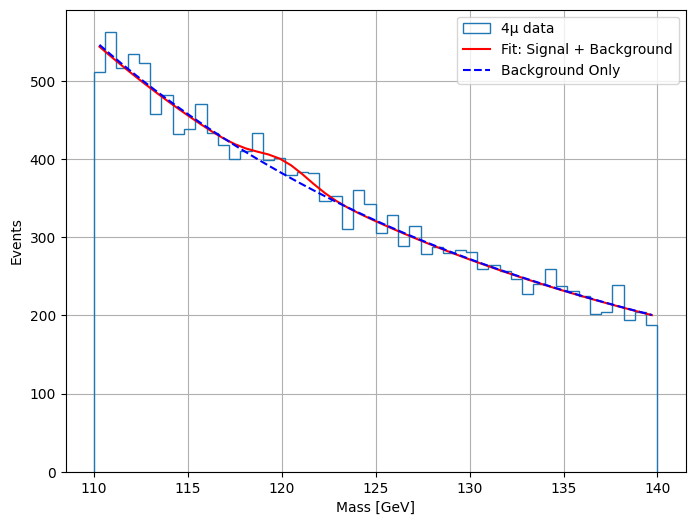

Fitted Higgs mass: 120.11 ± 0.90 GeV


In [9]:
def background(x, a, b):
    return a * (x**b)

def signal_plus_bg(x, A, mu, sigma, a, b):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2) + background(x, a, b)

hist_data, bins = np.histogram(higgs_mass, bins=50, range=(110, 140))
bin_centers = (bins[:-1] + bins[1:]) / 2

sideband_mask = (bin_centers < 120) | (bin_centers > 130)
sideband_bins = bin_centers[sideband_mask]
sideband_counts = hist_data[sideband_mask]

popt_bg, _ = curve_fit(background, sideband_bins, sideband_counts)

p0 = [100, 122, 0.5, popt_bg[0], popt_bg[1]]  # Initial guess within bounds

popt_sig_bg, pcov_sig_bg  = curve_fit(
    signal_plus_bg, bin_centers, hist_data, 
    p0=p0)

plt.figure(figsize=(8,6))
plt.grid(True)

plt.hist(higgs_mass, bins=50, range=(110, 140), histtype='step', label="4μ data")

plt.plot(bin_centers, signal_plus_bg(bin_centers, *popt_sig_bg), label="Fit: Signal + Background", color='red')

plt.plot(bin_centers, background(bin_centers, *popt_bg), label="Background Only", linestyle="dashed", color="blue")

plt.xlabel("Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

fitted_higgs_mass = popt_sig_bg[1]
higgs_mass_uncertainty = np.sqrt(np.diag(pcov_sig_bg))[1]

print(f"Fitted Higgs mass: {fitted_higgs_mass:.2f} ± {higgs_mass_uncertainty:.2f} GeV")

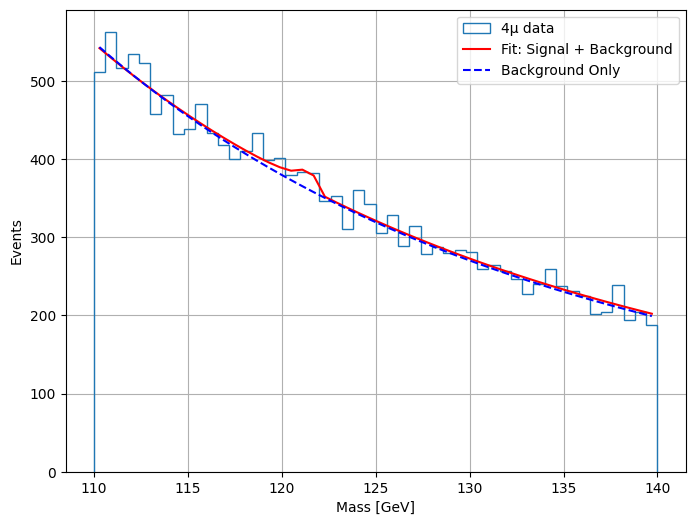

Fitted Higgs mass: 121.45 ± 1.98 GeV


In [10]:
def crystal_ball(x, A, mu, sigma, alpha, n):
    """
    A: Amplitude
    mu: Mean of Gaussian
    sigma: Gaussian width
    alpha: Transition point between Gaussian and power-law tail
    n: Power-law tail exponent
    """
    z = (x - mu) / sigma
    if z > -alpha:
        return A * np.exp(-0.5 * z**2)
    else:
        return A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) * \
               (n / abs(alpha) - abs(alpha) - z) ** (-n)

crystal_ball = np.vectorize(crystal_ball)

def background(x, a, b):
    return a * (x**b)

def signal_plus_bg(x, A, mu, sigma, alpha, n, a, b):
    return crystal_ball(x, A, mu, sigma, alpha, n) + background(x, a, b)

hist_data, bins = np.histogram(higgs_mass, bins=50, range=(110, 140))
bin_centers = (bins[:-1] + bins[1:]) / 2

sideband_mask = (bin_centers < 118) | (bin_centers > 130)
sideband_bins = bin_centers[sideband_mask]
sideband_counts = hist_data[sideband_mask]

popt_bg, _ = curve_fit(background, sideband_bins, sideband_counts)

p0 = [
    max(hist_data),  # A (initial amplitude)
    121.5,  # mu (Higgs mass start guess)
    2,  # sigma (resolution)
    1.2,  # alpha (transition between Gaussian & power-law tail)
    5.0,  # n (power of the tail)
    popt_bg[0],  # a (background parameter)
    popt_bg[1]   # b (background exponent)
]

popt_sig_bg, pcov_sig_bg = curve_fit(
    signal_plus_bg, bin_centers, hist_data, 
    p0=p0, bounds=([0, 120, 0.1, 0.5, 1, -np.inf, -np.inf], 
                   [np.inf, 130, 5, 3, 10, np.inf, np.inf])
)

fitted_higgs_mass = popt_sig_bg[1]
higgs_mass_uncertainty = np.sqrt(np.diag(pcov_sig_bg))[1]

plt.figure(figsize=(8,6))
plt.grid(True)

plt.hist(higgs_mass, bins=50, range=(110, 140), histtype='step', label="4μ data")

plt.plot(bin_centers, signal_plus_bg(bin_centers, *popt_sig_bg), label="Fit: Signal + Background", color='red')

plt.plot(bin_centers, background(bin_centers, *popt_bg), label="Background Only", linestyle="dashed", color="blue")

plt.xlabel("Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

# Print fitted Higgs mass
print(f"Fitted Higgs mass: {fitted_higgs_mass:.2f} ± {higgs_mass_uncertainty:.2f} GeV")

In [12]:
array_2 = np.array([520,598,555,520,531,529,518,501,443,476,445,458,465,445, 456, 430, 450, 395, 374,384,341,374,342,338,344,307,336,311,320,301,339,287,287,288,258,303,
 248,260,265,223,241,269,216,256,234,221,207,200,194,206])
array_3 = np.array([834.0, 794.0, 802.0, 808.0, 781.0, 824.0, 856.0, 744.0, 721.0, 759.0, 755.0, 725.0, 701.0, 678.0, 719.0, 665.0, 657.0, 676.0, 655.0, 674.0, 639.0, 657.0, 612.0, 619.0, 593.0, 604.0, 594.0, 548.0, 553.0, 566.0, 532.0, 520.0, 529.0, 510.0, 537.0, 480.0, 522.0, 504.0, 506.0, 464.0, 499.0, 466.0, 500.0, 457.0, 482.0, 463.0, 427.0, 422.0, 449.0, 438.0])

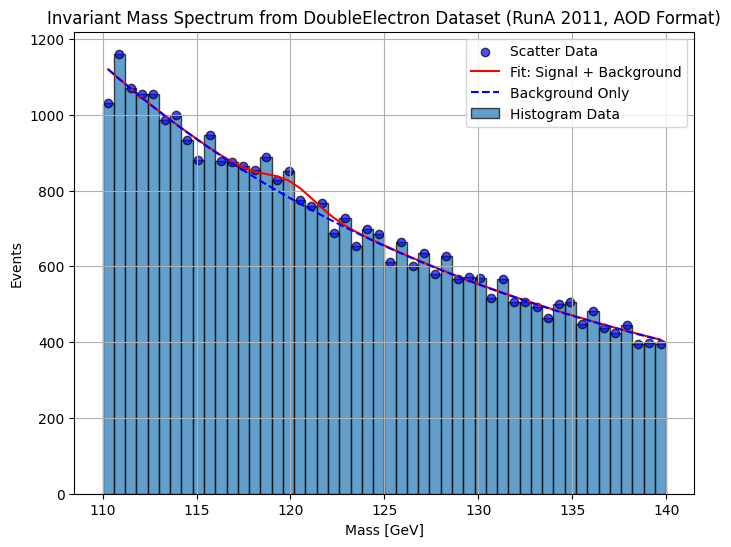

Fitted Higgs mass: 120.00 ± 0.66 GeV


In [25]:
def crystal_ball(x, A, mu, sigma, alpha, n):
    """
    Crystal Ball function: Gaussian core with power-law tail for signal peak fitting.
    A: Amplitude (peak height)
    mu: Mean of Gaussian (Higgs mass)
    sigma: Gaussian width (resolution)
    alpha: Transition point between Gaussian and power-law tail
    n: Power-law tail exponent
    """
    z = (x - mu) / sigma
    if z > -alpha:
        return A * np.exp(-0.5 * z**2)
    else:
        return A * (n / abs(alpha)) ** n * np.exp(-alpha**2 / 2) * \
               (n / abs(alpha) - abs(alpha) - z) ** (-n)

crystal_ball = np.vectorize(crystal_ball)

def background(x, a, b):
    return a * (x**b)

def signal_plus_bg(x, A, mu, sigma, alpha, n, a, b):
    return crystal_ball(x, A, mu, sigma, alpha, n) + background(x, a, b)

hist_data, bins = np.histogram(higgs_mass, bins=50, range=(110, 140))
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_widths = np.diff(bins)

hist_data = hist_data + array_2
sideband_mask = (bin_centers < 118) | (bin_centers > 130)
sideband_bins = bin_centers[sideband_mask]
sideband_counts = hist_data[sideband_mask]

popt_bg, _ = curve_fit(background, sideband_bins, sideband_counts)

p0 = [
    max(hist_data),  # A (initial amplitude)
    125,  # mu (Higgs mass start guess)
    2.0,    # sigma (resolution)
    1.2,  # alpha (transition between Gaussian & power-law tail)
    5.0,  # n (power of the tail)
    popt_bg[0],  # a (background parameter)
    popt_bg[1]   # b (background exponent)
]

popt_sig_bg, pcov_sig_bg = curve_fit(
    signal_plus_bg, bin_centers, hist_data, 
    p0=p0, bounds=([0, 120, 0.1, 0.5, 1, -np.inf, -np.inf], 
                   [np.inf, 130, 5, 3, 10, np.inf, np.inf])
)

fitted_higgs_mass = popt_sig_bg[1]
higgs_mass_uncertainty = np.sqrt(np.diag(pcov_sig_bg))[1]

plt.figure(figsize=(8,6))
plt.grid(True)

#plt.hist(higgs_mass, bins=50, range=(110, 140), histtype='step', label="4μ data")
plt.bar(bin_centers, hist_data, width=bin_widths, edgecolor='black', alpha=0.7, label="Histogram Data")
plt.scatter(bin_centers, hist_data, color='blue', edgecolor='black', alpha=0.7, label="Scatter Data")

plt.plot(bin_centers, signal_plus_bg(bin_centers, *popt_sig_bg), label="Fit: Signal + Background", color='red')

plt.plot(bin_centers, background(bin_centers, *popt_bg), label="Background Only", linestyle="dashed", color="blue")

plt.xlabel("Mass [GeV]")
plt.ylabel("Events")
plt.title('Invariant Mass Spectrum from DoubleElectron Dataset (RunA 2011, AOD Format)')
plt.legend()

plt.savefig('8')

plt.show()

# Print fitted Higgs mass
print(f"Fitted Higgs mass: {fitted_higgs_mass:.2f} ± {higgs_mass_uncertainty:.2f} GeV")


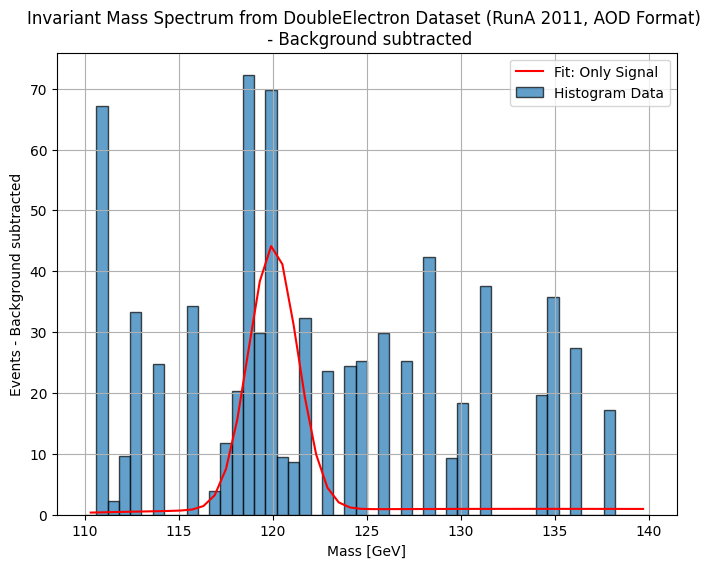

In [29]:
# Plot results
plt.figure(figsize=(8,6))
plt.grid(True)

plt.plot(bin_centers, signal_plus_bg(bin_centers, *popt_sig_bg) - background(bin_centers, *popt_bg), label="Fit: Only Signal", color='red')
a = hist_data - background(bin_centers, *popt_bg)
a[a < 0] = 0
plt.bar(bin_centers, a, width=bin_widths, edgecolor='black', alpha=0.7, label="Histogram Data")

plt.xlabel("Mass [GeV]")
plt.ylabel("Events - Background subtracted")
plt.title('Invariant Mass Spectrum from DoubleElectron Dataset (RunA 2011, AOD Format) \n - Background subtracted')
plt.legend()

plt.savefig('9')

plt.show()